# 미니 프로젝트 참고 자료

In [1]:
!rm -rf bigStudy

/bin/bash: rm -rf bigStudy: command not found


In [2]:
!git clone 'https://github.com/looker2zip/bigStudy.git'

Cloning into 'bigStudy'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 37 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


## 1.분석용 데이터 셋 구축 사례

### 1-1 데이터 셋 로드

In [3]:
import pandas as pd

In [4]:
스마트폰=pd.read_excel("bigStudy/dataset/phone.xlsx")

In [ ]:
type(스마트폰)

pandas.core.frame.DataFrame

### 1-2 EDA




In [5]:
스마트폰.head()

,Unnamed: 0,스마트폰 관련,Unnamed: 2,Unnamed: 3,사용자 관련,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,출시년도,구매시기,디스플레이 크기\n(인치),연령,키\n(cm),몸무게\n(kg),평균 스마트폰\n사용시간\n(분/일),평균 컴퓨터\n사용시간\n(분/일),데이터\n사용량\n(mb/일)
1,1.0,2015,2015,5,45,173,75,60,500,100
2,2.0,2014,2015,4.5,27,176,59,70,30,50
3,3.0,2015,2015,5,29,183,65,120,300,200
4,4.0,2015,2016,5,28,172,63,80,60,190


In [6]:
# 행 개수
len(스마트폰)

25

In [7]:
# 열 개수
len(스마트폰.columns)

10

In [8]:
스마트폰.shape

(25, 10)

In [9]:
# Null 값이 아닌 행 개수
스마트폰.count()

Unnamed: 0    24
스마트폰 관련       25
Unnamed: 2    25
Unnamed: 3    25
사용자 관련        25
Unnamed: 5    25
Unnamed: 6    25
Unnamed: 7    25
Unnamed: 8    25
Unnamed: 9    25
dtype: int64

In [10]:
스마트폰['Unnamed: 0'].count()

24

In [11]:
# 그룹별 개수 구하기
스마트폰.groupby('Unnamed: 0').size()
스마트폰.groupby('Unnamed: 0').count()

,스마트폰 관련,Unnamed: 2,Unnamed: 3,사용자 관련,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
Unnamed: 0,,,,,,,,,
1.0,1,1,1,1,1,1,1,1,1
2.0,1,1,1,1,1,1,1,1,1
3.0,1,1,1,1,1,1,1,1,1
4.0,1,1,1,1,1,1,1,1,1
5.0,1,1,1,1,1,1,1,1,1
6.0,1,1,1,1,1,1,1,1,1
7.0,1,1,1,1,1,1,1,1,1
8.0,1,1,1,1,1,1,1,1,1
9.0,1,1,1,1,1,1,1,1,1


### 1-3  필요없는 행 삭제 후 데이터 셋 저장

In [12]:
# 행 삭제
스마트폰=스마트폰.drop(index=[0], axis=0)
스마트폰.head()
# 열 삭제 : 스마트폰=스마트폰.drop(columns=['co11','col2'], axis=1)
# 조건에 맞는 행 삭제 : 스마트폰=스마트폰[스마트폰['co11'] != 15]

,Unnamed: 0,스마트폰 관련,Unnamed: 2,Unnamed: 3,사용자 관련,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
1,1.0,2015,2015,5,45,173,75,60,500,100
2,2.0,2014,2015,4.5,27,176,59,70,30,50
3,3.0,2015,2015,5,29,183,65,120,300,200
4,4.0,2015,2016,5,28,172,63,80,60,190
5,5.0,2015,2015,5,24,179,65,90,30,500


In [13]:
스마트폰.shape

(24, 10)

In [14]:
스마트폰.to_csv('스마트폰_1행삭제.csv')

### 1-4 데이터 셋 로드-csv

In [15]:
import pandas as pd

In [16]:
스마트폰=pd.read_csv('스마트폰_1행삭제.csv')

In [17]:
스마트폰.shape

(24, 11)

In [18]:
스마트폰.head()

,Unnamed: 0,Unnamed: 0.1,스마트폰 관련,Unnamed: 2,Unnamed: 3,사용자 관련,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,1.0,2015,2015,5.0,45,173,75,60,500,100
1,2,2.0,2014,2015,4.5,27,176,59,70,30,50
2,3,3.0,2015,2015,5.0,29,183,65,120,300,200
3,4,4.0,2015,2016,5.0,28,172,63,80,60,190
4,5,5.0,2015,2015,5.0,24,179,65,90,30,500


### 1-5 열 이름 변경

In [19]:
# 열 삭제
스마트폰=스마트폰.drop(columns=['Unnamed: 0.1'], axis=1)
스마트폰.head()

,Unnamed: 0,스마트폰 관련,Unnamed: 2,Unnamed: 3,사용자 관련,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,2015,2015,5.0,45,173,75,60,500,100
1,2,2014,2015,4.5,27,176,59,70,30,50
2,3,2015,2015,5.0,29,183,65,120,300,200
3,4,2015,2016,5.0,28,172,63,80,60,190
4,5,2015,2015,5.0,24,179,65,90,30,500


In [20]:
# 행,열 하나 하나에 대해서 이름을 변경
스마트폰=스마트폰.rename(
    {
        'Unnamed: 0':'순번',
        '스마트폰 관련':'출시년도',
        'Unnamed: 6':'몸무게'
    }, axis='columns'
)

In [21]:
스마트폰.head()

,순번,출시년도,Unnamed: 2,Unnamed: 3,사용자 관련,Unnamed: 5,몸무게,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1,2015,2015,5.0,45,173,75,60,500,100
1,2,2014,2015,4.5,27,176,59,70,30,50
2,3,2015,2015,5.0,29,183,65,120,300,200
3,4,2015,2016,5.0,28,172,63,80,60,190
4,5,2015,2015,5.0,24,179,65,90,30,500


In [22]:
# 모든 열에 대해서 한꺼번에 변경
스마트폰.columns=['순번','출시년도',"구매시기", "디스플레이","연령","키","몸무게","스마트폰사용시간","컴퓨터사용시간","데이터사용량"]

In [23]:
스마트폰.head()

,순번,출시년도,구매시기,디스플레이,연령,키,몸무게,스마트폰사용시간,컴퓨터사용시간,데이터사용량
0,1,2015,2015,5.0,45,173,75,60,500,100
1,2,2014,2015,4.5,27,176,59,70,30,50
2,3,2015,2015,5.0,29,183,65,120,300,200
3,4,2015,2016,5.0,28,172,63,80,60,190
4,5,2015,2015,5.0,24,179,65,90,30,500


In [24]:
스마트폰.to_csv('스마트폰_분석용데이터셋완성본.csv')

### 1-6 데이터 셋을 다시 적재

In [25]:
import pandas as pd
스마트폰=pd.read_csv('스마트폰_분석용데이터셋완성본.csv')

In [26]:
스마트폰.head()

,Unnamed: 0,순번,출시년도,구매시기,디스플레이,연령,키,몸무게,스마트폰사용시간,컴퓨터사용시간,데이터사용량
0,0,1,2015,2015,5.0,45,173,75,60,500,100
1,1,2,2014,2015,4.5,27,176,59,70,30,50
2,2,3,2015,2015,5.0,29,183,65,120,300,200
3,3,4,2015,2016,5.0,28,172,63,80,60,190
4,4,5,2015,2015,5.0,24,179,65,90,30,500


In [27]:
스마트폰=스마트폰.drop(columns=['Unnamed: 0'], axis=1)

In [28]:
스마트폰.head()

,순번,출시년도,구매시기,디스플레이,연령,키,몸무게,스마트폰사용시간,컴퓨터사용시간,데이터사용량
0,1,2015,2015,5.0,45,173,75,60,500,100
1,2,2014,2015,4.5,27,176,59,70,30,50
2,3,2015,2015,5.0,29,183,65,120,300,200
3,4,2015,2016,5.0,28,172,63,80,60,190
4,5,2015,2015,5.0,24,179,65,90,30,500


### 1-7 분석 데이터 식별

스마트폰$출시년도==2016

스마트폰[,9] > 500

In [29]:
스마트폰출시년도조회=스마트폰.loc[
                    (
                        스마트폰['출시년도'] == 2016
                    )
]

In [30]:
스마트폰출시년도조회=스마트폰.loc[(스마트폰['출시년도']==2016)]

In [31]:
len(스마트폰출시년도조회)

8

In [32]:
스마트폰출시년도조회.head()

,순번,출시년도,구매시기,디스플레이,연령,키,몸무게,스마트폰사용시간,컴퓨터사용시간,데이터사용량
5,6,2016,2016,5.5,34,175,73,80,480,160
6,7,2016,2016,6.0,40,169,77,60,300,170
13,14,2016,2016,6.0,41,181,88,60,120,130
16,17,2016,2016,5.5,35,184,72,90,90,70
17,18,2016,2016,6.0,34,176,71,90,60,130


In [33]:
스마트폰데이터사용량=스마트폰.loc[
                    (
                        스마트폰['데이터사용량'] > 500
                    )
]

In [34]:
len(스마트폰데이터사용량)

3

In [35]:
스마트폰데이터사용량.head()

,순번,출시년도,구매시기,디스플레이,연령,키,몸무게,스마트폰사용시간,컴퓨터사용시간,데이터사용량
18,19,2015,2015,4.5,29,188,83,140,240,600
22,23,2015,2015,5.0,26,179,80,180,30,1100
23,24,2016,2016,6.0,25,177,76,120,90,700


#쪽지시험 : 출시년도에 따른 연령별 스마트폰 사용시간 합계를 구해보세요

In [36]:
스마트폰.groupby(['출시년도','연령'])['스마트폰사용시간'].sum()

출시년도  연령
2014  27     70
      30    100
      32    130
      40     50
2015  24     90
      26    180
      28     80
      29    260
      32     70
      35    110
      37     90
      40     70
      42     40
      45     60
2016  25    180
      30     50
      34    170
      35     90
      40     60
      41     60
Name: 스마트폰사용시간, dtype: int64

### 1-8 시각화

출시년도에 따른 스마트폰 사용시간에 대한 차트 혹은 그래프를 작성해 제출하시오.

In [37]:
sum_by_year=스마트폰.groupby(['출시년도'])['스마트폰사용시간'].sum()

In [38]:
sum_by_year

출시년도
2014     350
2015    1050
2016     610
Name: 스마트폰사용시간, dtype: int64

In [39]:
label=['2014','2015','2016']

In [40]:
import numpy as np
index=np.arange(len(label))

([<matplotlib.axis.XTick at 0x7fe135d7c750>,
 [Text(0, 0, '2014'), Text(0, 0, '2015'), Text(0, 0, '2016')])

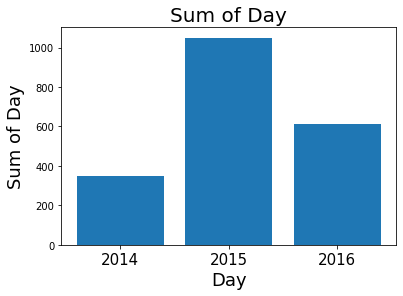

In [41]:
import matplotlib.pyplot as plt

plt.bar(index, sum_by_year)

plt.title('Sum of Day', fontsize=20)

plt.xlabel('Day', fontsize=18)
plt.ylabel('Sum of Day', fontsize=18)

plt.xticks(index, label, fontsize=15)

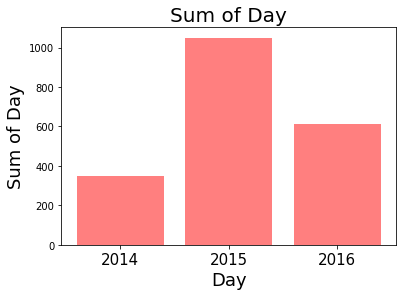

In [42]:
plt.bar(
    index, sum_by_year,
    color='red',
    alpha=0.5
)

plt.title('Sum of Day', fontsize=20)

plt.xlabel('Day', fontsize=18)
plt.ylabel('Sum of Day', fontsize=18)

plt.xticks(index, label, fontsize=15)

plt.show()

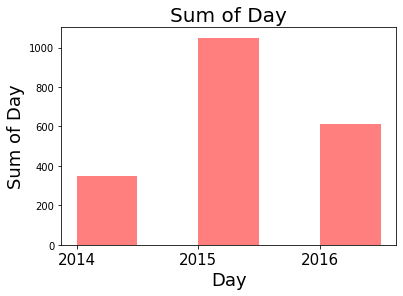

In [43]:
plt.bar(
    index, sum_by_year,
    color='red',
    alpha=0.5,
    width=0.5, #기본값 0.8
    align='edge' #default : center
)

plt.title('Sum of Day', fontsize=20)

plt.xlabel('Day', fontsize=18)
plt.ylabel('Sum of Day', fontsize=18)

plt.xticks(index, label, fontsize=15)

plt.show()

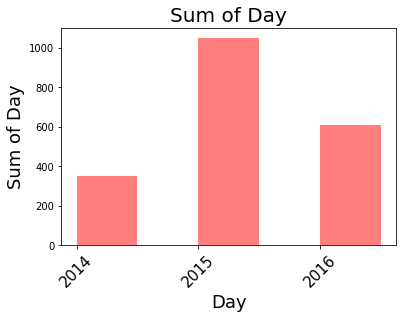

In [44]:
plt.bar(
    index, sum_by_year,
    color='red',
    alpha=0.5,
    width=0.5, #기본값 0.8
    align='edge' #default : center
)

plt.title('Sum of Day', fontsize=20)

plt.xlabel('Day', fontsize=18)
plt.ylabel('Sum of Day', fontsize=18)

plt.xticks(index, label, fontsize=15, rotation=45)

plt.show()

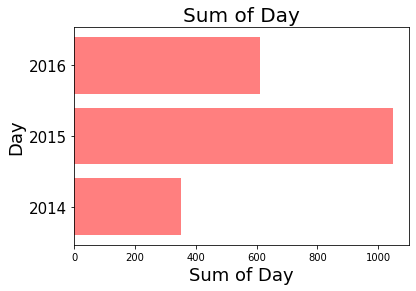

In [45]:
plt.barh(    #수정
    index, sum_by_year,
    color='red',
    alpha=0.5,
    align='center' #default : center
)

plt.title('Sum of Day', fontsize=20)

plt.xlabel('Sum of Day', fontsize=18)
plt.ylabel('Day', fontsize=18)

# plt.xticks(index, label, fontsize=15, rotation=45)
plt.yticks(index, label, fontsize=15, rotation=0) # 수정

plt.show()

In [46]:
sum_by_year.index

Int64Index([2014, 2015, 2016], dtype='int64', name='출시년도')

In [47]:
sum_by_year.values

array([ 350, 1050,  610])

In [48]:
plt.rcParams['figure.figsize']=[12,8]

In [49]:
group_names=sum_by_year.index
group_sizes=sum_by_year.values
group_colors=['yellowgreen','lightskyblue','lightcoral']
group_explodes=(0.1, 0, 0)

Text(0.5, 1.0, '2014-2016 sum by day')

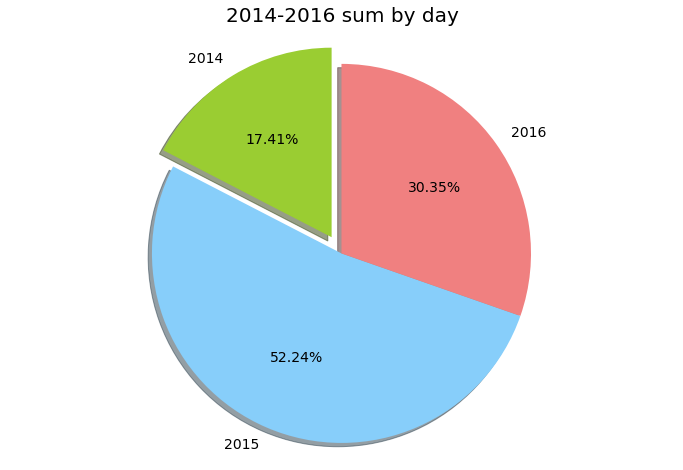

In [50]:
plt.pie(
    group_sizes,
    explode=group_explodes,
    labels=group_names,
    colors=group_colors,
    autopct='%1.2f%%',
    shadow=True,
    startangle=90,
    textprops={'fontsize': 14}
)

plt.axis('equal')

plt.title('2014-2016 sum by day', fontsize=20)

In [51]:
스마트폰.head()

,순번,출시년도,구매시기,디스플레이,연령,키,몸무게,스마트폰사용시간,컴퓨터사용시간,데이터사용량
0,1,2015,2015,5.0,45,173,75,60,500,100
1,2,2014,2015,4.5,27,176,59,70,30,50
2,3,2015,2015,5.0,29,183,65,120,300,200
3,4,2015,2016,5.0,28,172,63,80,60,190
4,5,2015,2015,5.0,24,179,65,90,30,500


## 데이터 사용량에 대한 차트를 작성해 제출하시오.

In [52]:
import pandas as pd

In [53]:
%precision 3

'%.3f'

In [54]:
from matplotlib import pyplot as plt

In [55]:
%matplotlib inline

In [56]:
Temp_data=스마트폰['데이터사용량']

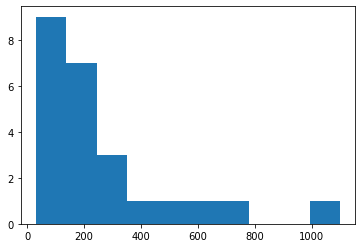

In [57]:
n, bins, patches=plt.hist(Temp_data, bins=10)

In [58]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

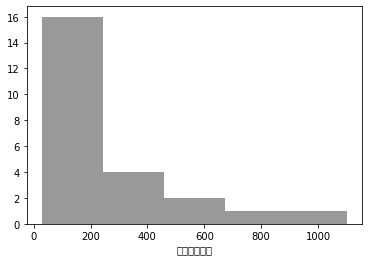

In [59]:
sns.distplot(Temp_data, bins=5, color='black', kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

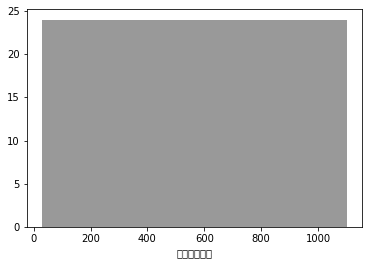

In [60]:
sns.distplot(Temp_data, bins=1, color='black', kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

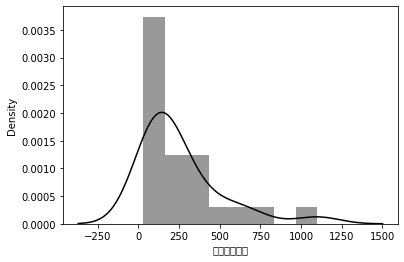

In [61]:
sns.distplot(Temp_data, color='black')

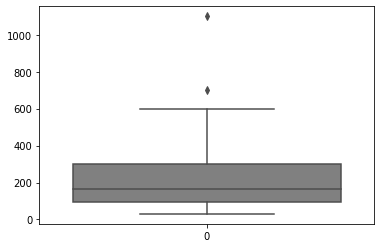

In [62]:
sns.boxplot(data=Temp_data, color='gray')

### 1-9 분석 데이터 변환
일일 데이터 사용량을 5개의 군집으 로 나누어 평활한다.

In [63]:
from sklearn.cluster import KMeans

In [64]:
# 클러스터 생성

kms=KMeans(n_clusters=5)

In [65]:
스마트폰데이터사용량=스마트폰.loc[
                    (
                        스마트폰['데이터사용량'] != 0
                    )
]

In [66]:
len(스마트폰데이터사용량)

24

In [67]:
kms.fit(스마트폰데이터사용량)

KMeans(n_clusters=5)

In [68]:
kms

KMeans(n_clusters=5)

In [69]:
kms.labels_

array([3, 0, 3, 0, 4, 3, 3, 0, 1, 3, 1, 3, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1,
       2, 4], dtype=int32)

In [70]:
kms.predict(스마트폰데이터사용량)

array([3, 0, 3, 0, 4, 3, 3, 0, 1, 3, 1, 3, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1,
       2, 4], dtype=int32)

In [71]:
center=kms.cluster_centers_
print(center)

[[  12.7   2015.2   2015.4      5.35    34.5    176.6     73.3     67.
    81.     104.   ]
 [  15.75  2014.75  2014.75     5.      29.75   175.25    68.25    90.
   142.5    325.   ]
 [  23.    2015.    2015.       5.      26.     179.      80.     180.
    30.    1100.   ]
 [   6.5   2015.333 2015.333    5.333   37.833  174.667   73.167   75.
   403.333  143.333]
 [  16.    2015.333 2015.333    5.167   26.     181.333   74.667  116.667
   120.     600.   ]]


In [72]:
스마트폰_cbind=pd.concat([스마트폰, pd.DataFrame(kms.cluster_centers_)], axis=1)

In [73]:
스마트폰_cbind.head()

,순번,출시년도,구매시기,디스플레이,연령,키,몸무게,스마트폰사용시간,컴퓨터사용시간,데이터사용량,0,1,2,3,4,5,6,7,8,9
0,1,2015,2015,5.0,45,173,75,60,500,100,12.70,2015.200000,2015.400000,5.350000,34.500000,176.600000,73.300000,67.000000,81.000000,104.000000
1,2,2014,2015,4.5,27,176,59,70,30,50,15.75,2014.750000,2014.750000,5.000000,29.750000,175.250000,68.250000,90.000000,142.500000,325.000000
2,3,2015,2015,5.0,29,183,65,120,300,200,23.00,2015.000000,2015.000000,5.000000,26.000000,179.000000,80.000000,180.000000,30.000000,1100.000000
3,4,2015,2016,5.0,28,172,63,80,60,190,6.50,2015.333333,2015.333333,5.333333,37.833333,174.666667,73.166667,75.000000,403.333333,143.333333
4,5,2015,2015,5.0,24,179,65,90,30,500,16.00,2015.333333,2015.333333,5.166667,26.000000,181.333333,74.666667,116.666667,120.000000,600.000000


# 2 포지셔닝 분석 사례

## 2-1 데이터 불러오기

In [85]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-11-0 cuda-nsight-systems-11-1
  cuda-nvc

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf


Text(0.3, 0.3, '한글')

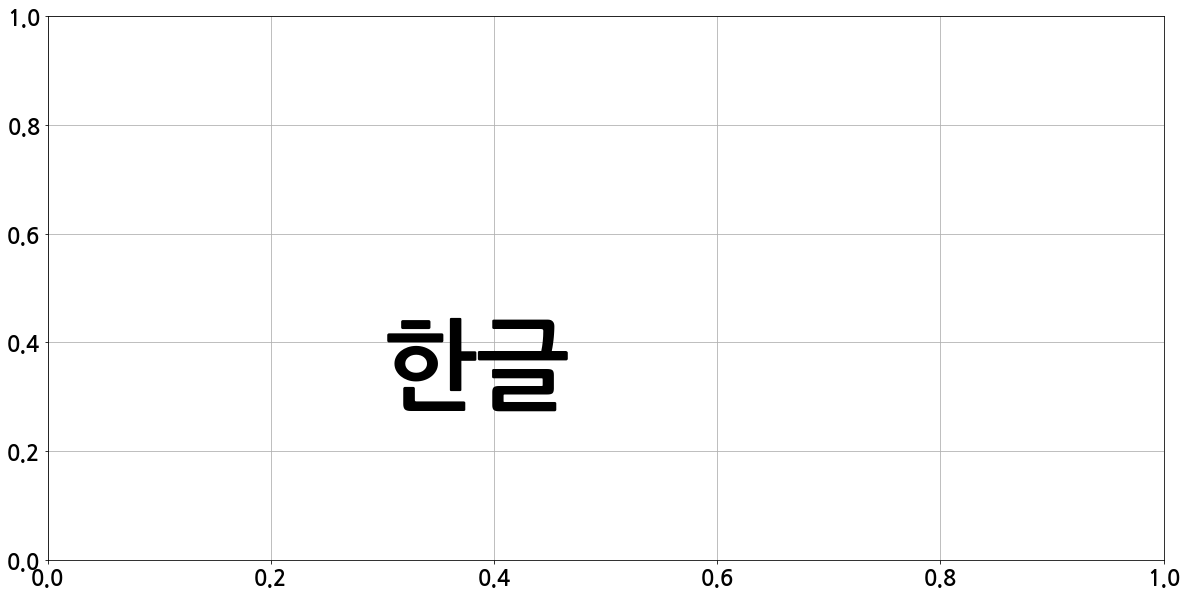

In [4]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
mpl.font_manager._rebuild()
fm._rebuild()
font = {'family' : 'NanumGothic',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.text(0.3, 0.3, '한글', size=100)

※ 한글이 안 나오면 런타임 다시 시작해 주세요

In [5]:
import pandas as pd

trend_w_demo = pd.read_csv('bigStudy/dataset/trend_w_demo.csv', encoding="EUC-KR")
trend_w_demo.head()

,Unnamed: 0,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,0,202005,할인점,0.0,F,high,low,high,mid,low,low
1,1,202005,취미,0.0,B,high,low,mid,mid,low,low
2,2,202005,오픈마켓/소셜,1.0,D,mid,mid,mid,mid,low,mid
3,3,202005,뷰티,0.0,D,mid,mid,mid,mid,low,low
4,4,202005,오픈마켓/소셜,0.0,G,high,low,mid,mid,mid,low


Category, 성별구분, 연령대는 명목형 변수인데 반해
기혼스코어:전업주부스코어의 경우는 확률이다.

---

기혼스코어 : 카드 이용 고객이 기혼일 확률
유아자녀스코어 : 카드 이용 고객이에게 유아자녀가 있을 확률
초등학생자녀스코어 : 카드 이용 고객이에게 초등학생 자녀가 있을 확률
중고생자녀스코어 : 카드 이용 고객이에게 중고생 자녀가 있을 확률
대학생자녀스코어 : 카드 이용 고객이에게 대학생 자녀가 있을 확률
전업주부스코어 : 카드 이용 고객이 전업주부일 확률

## 2-2 데이터셋 필터링

In [6]:
new_df = trend_w_demo[trend_w_demo['YM'].isin([202004, 202005])]
trend_w_demo.shape, new_df.shape

((24, 11), (24, 11))

## 2-3 단순 상응분석의 개념적 분석 과정

In [7]:
!pip install prince

## 2-4 함수화

In [8]:
# module 
import pandas as pd
import matplotlib.pyplot as plt
import prince

# 폰트 세팅
font = {'family' : 'NanumGothic',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

def plot_ca(X = None, component1 = None, component2 = None):
    """단순 상응분석 그래프 작성

    Keyword arguments:
    X -- 명목형 판다스데이터프레임 (default None)
    Component1 -- Category 변수명 (default None)
    Component2 -- 스코어 변수명 (default None)
    """
    ca_model = pd.crosstab(X[component1], X[component2], margins=False)
    ca = prince.CA(n_components=2).fit(ca_model)
    ax = ca.plot_coordinates(X = ca_model, figsize=(10, 10))
    ax.set_title("상응분석", fontsize = 24)

## 2-5 단순 상응분석: 기혼스코어 기준

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


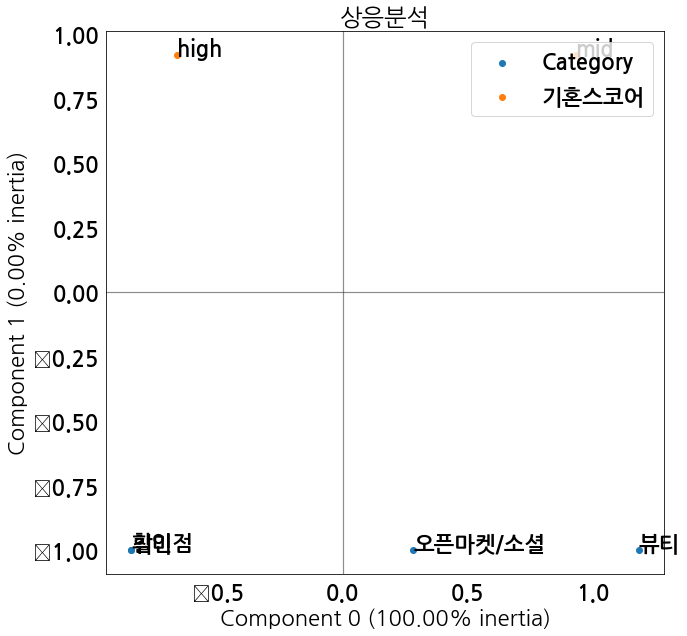

In [9]:
plot_ca(new_df, component1 = "Category", component2 = "기혼스코어")

※맵을 직관적으로 해석하는 방법은 서로 가까이 있는 범주들은 서로 비슷하거나 연관성이 높은 것으로 판단하면 되고, 멀리 떨어진 범주들은 서로 다르거나 연관성이 적은 범주들로 해석한다.

# 2-6 단순 상응분석: 유아자녀 스코어 기준

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


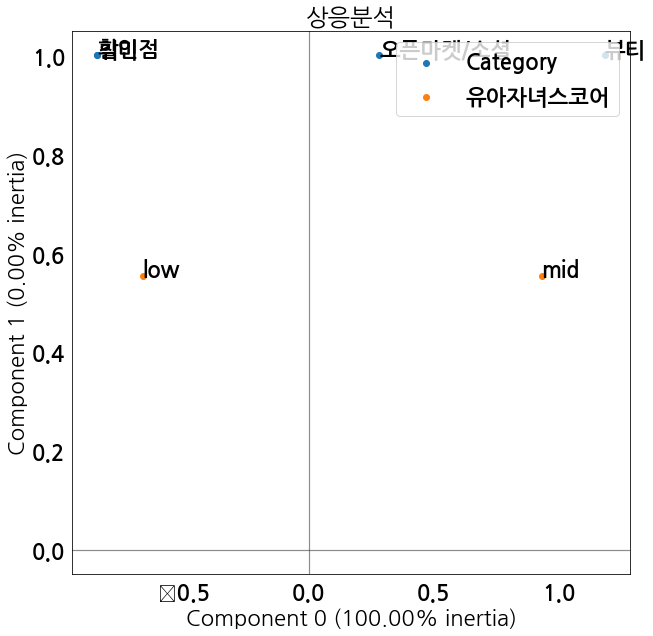

In [10]:
plot_ca(new_df, component1 = "Category", component2 = "유아자녀스코어")